EJERICIO 1.

Utilizando el metodo de proyeccion de Galerkin encuentre los coeficientes que permiten aproximar la función en cada caso.

In [44]:
# Importacion de librerias
import numpy as np
import sympy as sym 
from numpy.linalg import det, inv
from scipy.integrate import quad
from sympy.plotting import plot

# Funcion para la aprximacion numerica, de la manera  A*X= b, donde A se refiere a los polinomios, x a los coeficientes y b a la funcion aproximada.

def aproximacion_num(f, ui, lim):
    n = len(ui) # numero de iteraciones 
    x = sym.Symbol('x') # simbolo de la variable independiente (icognita)
    A = sym.zeros(n,n) # Matriz de la longitud de la cantidad de polinomios
    b = sym.zeros(n,1) # Vector de los funcion segun el polinomio

    # Iteracion 
    for i in range(n):
        for j in range(i, n): 

            # Funcion aporximada
            funcion = sym.lambdify(x, ui[i]*ui[j]) 

            # Matriz de polinomios (A= [a_ij]= ui(x).uj(x))
            A[i,j] = quad(funcion, lim[0], lim[1])[0]
            A[j,i] = A[i,j]

        # Funcion aporximada
        funcion = sym.lambdify(x, ui[i]*f)

        # Vector de funciones (b = [b_i] = f(x).ui(x))
        b[i,0] = quad(funcion, lim[0], lim[1])[0]

    alp = A.LUsolve(b)

    f_aprox = 0

    for i in range(n):
        f_aprox += alp[i,0]*ui[i]

    funcion = sym.lambdify(x, (f-f_aprox)*(f-f_aprox))
    e  = np.sqrt(quad(funcion, lim[0], lim[1])[0]) # Magnitud del error
    print(f"El error entre la funcion real y la aproximada es de {e}")

    return A, b, f_aprox, alp

    

a. Aproximar $tan(x)$ sobre el conjunto {1, $e^{−x}$, $e^{−2x}$, $e^{x}$, $e^{2x}$}, en el intervalo [0, π/4]

El error entre la funcion real y la aproximada es de 0.00011111664875482143
La funcion aproximada es 0.296475608312038*exp(2*x) - 0.731803087250492*exp(x) + 2.00072056418756 - 2.0036617319948*exp(-x) + 0.438611370407534*exp(-2*x)


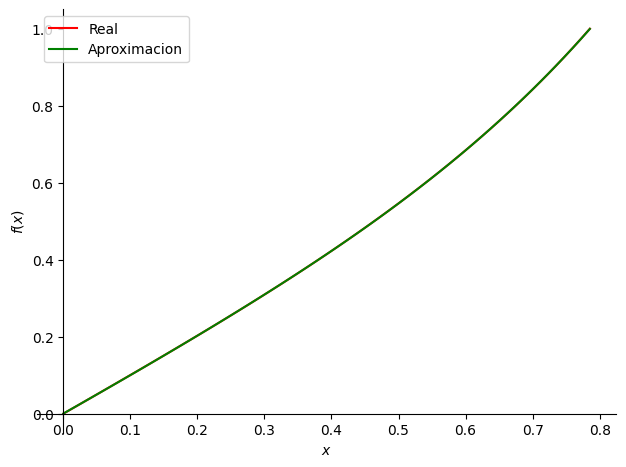

In [50]:
x = sym.Symbol('x')

f = sym.tan(x) #Funcion a aproximar

ui = [1, sym.exp(-x), sym.exp(-2*x), sym.exp(x), sym.exp(2*x)] # "Polinomios" con los que se aproxima

lim = [0, (np.pi)/4]    #Rango en el que se hace la integracion

A, b, f_aprox, alp = aproximacion_num(f, ui, lim)

m = f_aprox #Funcion aproximada 
print(f"La funcion aproximada es {m}")

# GRAFICO DE LAS FUNCIONES

grafico = plot(f,m, (x, lim[0], lim[1]), show=False, legend= True) #Grafico en los limites dados
#grafico = plot(f,m, (x, -1, lim[1]), show=False) #Permite ver las funciones en un rango mas amplio 
grafico[0].line_color= 'r'
grafico[0].label = "Real"
grafico[1].line_color= 'g'
grafico[1].label = "Aproximacion"
grafico.show()


b. Aproximar f(x) = \[\frac{$d^{2}$}{$dx^{2}$}($e^{-x^2}$)\], sobre el conjunto {$sin(iπx)$, $cos(iπx)$}, con i ∈ {1, 2, 3}, en el intervalo [−5, 5]

El error entre la funcion real y la aproximada es de 1.8220231109328389
La funcion aproximada es -0.296705771889363*cos(3.14159265358979*x) - 0.00072385230661013*cos(6.28318530717959*x) - 7.11477485870297e-9*cos(9.42477796076938*x)


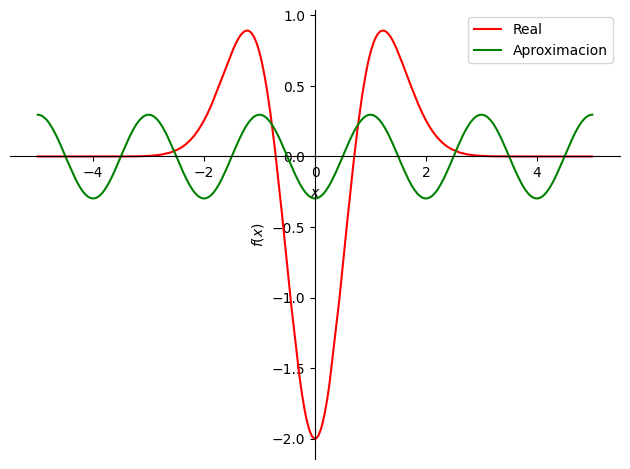

In [51]:
x = sym.Symbol('x')

f = sym.exp(-x**2) #Funcion a aproximar

derivada_2 = f.diff(x,x)

#ui = []

#for i in range(1, 4):
    #ui.append([sym.sin(i*np.pi*x), sym.cos(i*np.pi*x)]) # "Polinomios" con los que se aproxima

ui = [sym.sin(np.pi*x), sym.cos(np.pi*x), sym.sin(2*np.pi*x),sym.cos(2*np.pi*x), sym.sin(3*np.pi*x), sym.cos(3*np.pi*x)]


lim = [-5, 5]    #Rango en el que se hace la integracion

A, b, f_aprox, alp = aproximacion_num(derivada_2, ui, lim)

m = f_aprox #Funcion aproximada 
print(f"La funcion aproximada es {m}")

# GRAFICO DE LAS FUNCIONES

grafico = plot(derivada_2,m, (x, lim[0], lim[1]), show=False, legend= True) #Grafico en los limites dados
#grafico = plot(f,m, (x, -1, lim[1]), show=False) #Permite ver las funciones en un rango mas amplio 
grafico[0].line_color= 'r'
grafico[0].label = "Real"
grafico[1].line_color= 'g'
grafico[1].label = "Aproximacion"
grafico.show()


c. f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$, sobre el conjunto {$1, x, x^{2}, x^{3}, x^{4}, x^{5}$}, en el intervalo [−2, 4]

El error entre la funcion real y la aproximada es de 0.35395011099056606
La funcion aproximada es -0.0118957196778012*x**5 + 0.0535719952843212*x**4 + 0.0630927148339173*x**3 - 0.412976319014695*x**2 - 0.0350468286446076*x + 0.844037636831369


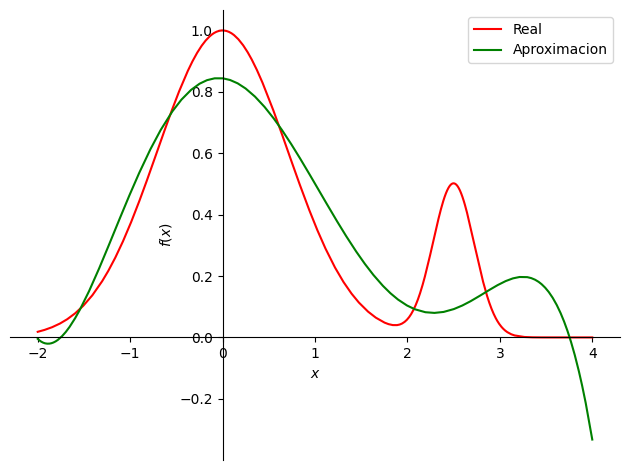

In [52]:
x = sym.Symbol('x')

f = sym.exp(-x**2) + 0.5 * sym.exp(-10*(x-2.5)**2) #Funcion a aproximar

ui = [1, x, x**2, x**3, x**4, x**5] # "Polinomios" con los que se aproxima

lim = [-2, 4]    #Rango en el que se hace la integracion

A, b, f_aprox, alp = aproximacion_num(f, ui, lim)

m = f_aprox #Funcion aproximada 
print(f"La funcion aproximada es {m}")

# GRAFICO DE LAS FUNCIONES

grafico = plot(f,m, (x, lim[0], lim[1]), show=False, legend= True) #Grafico en los limites dados
#grafico = plot(f,m, (x, -1, lim[1]), show=False) #Permite ver las funciones en un rango mas amplio 
grafico[0].line_color= 'r'
grafico[0].label = "Real"
grafico[1].line_color= 'g'
grafico[1].label = "Aproximacion"
grafico.show()